**Bayu Firmansyah Submission 1 MLT**

# **Data Loading**

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Restore/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Variable Description**

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# **Univariate Analysis**

**Numerical Features**

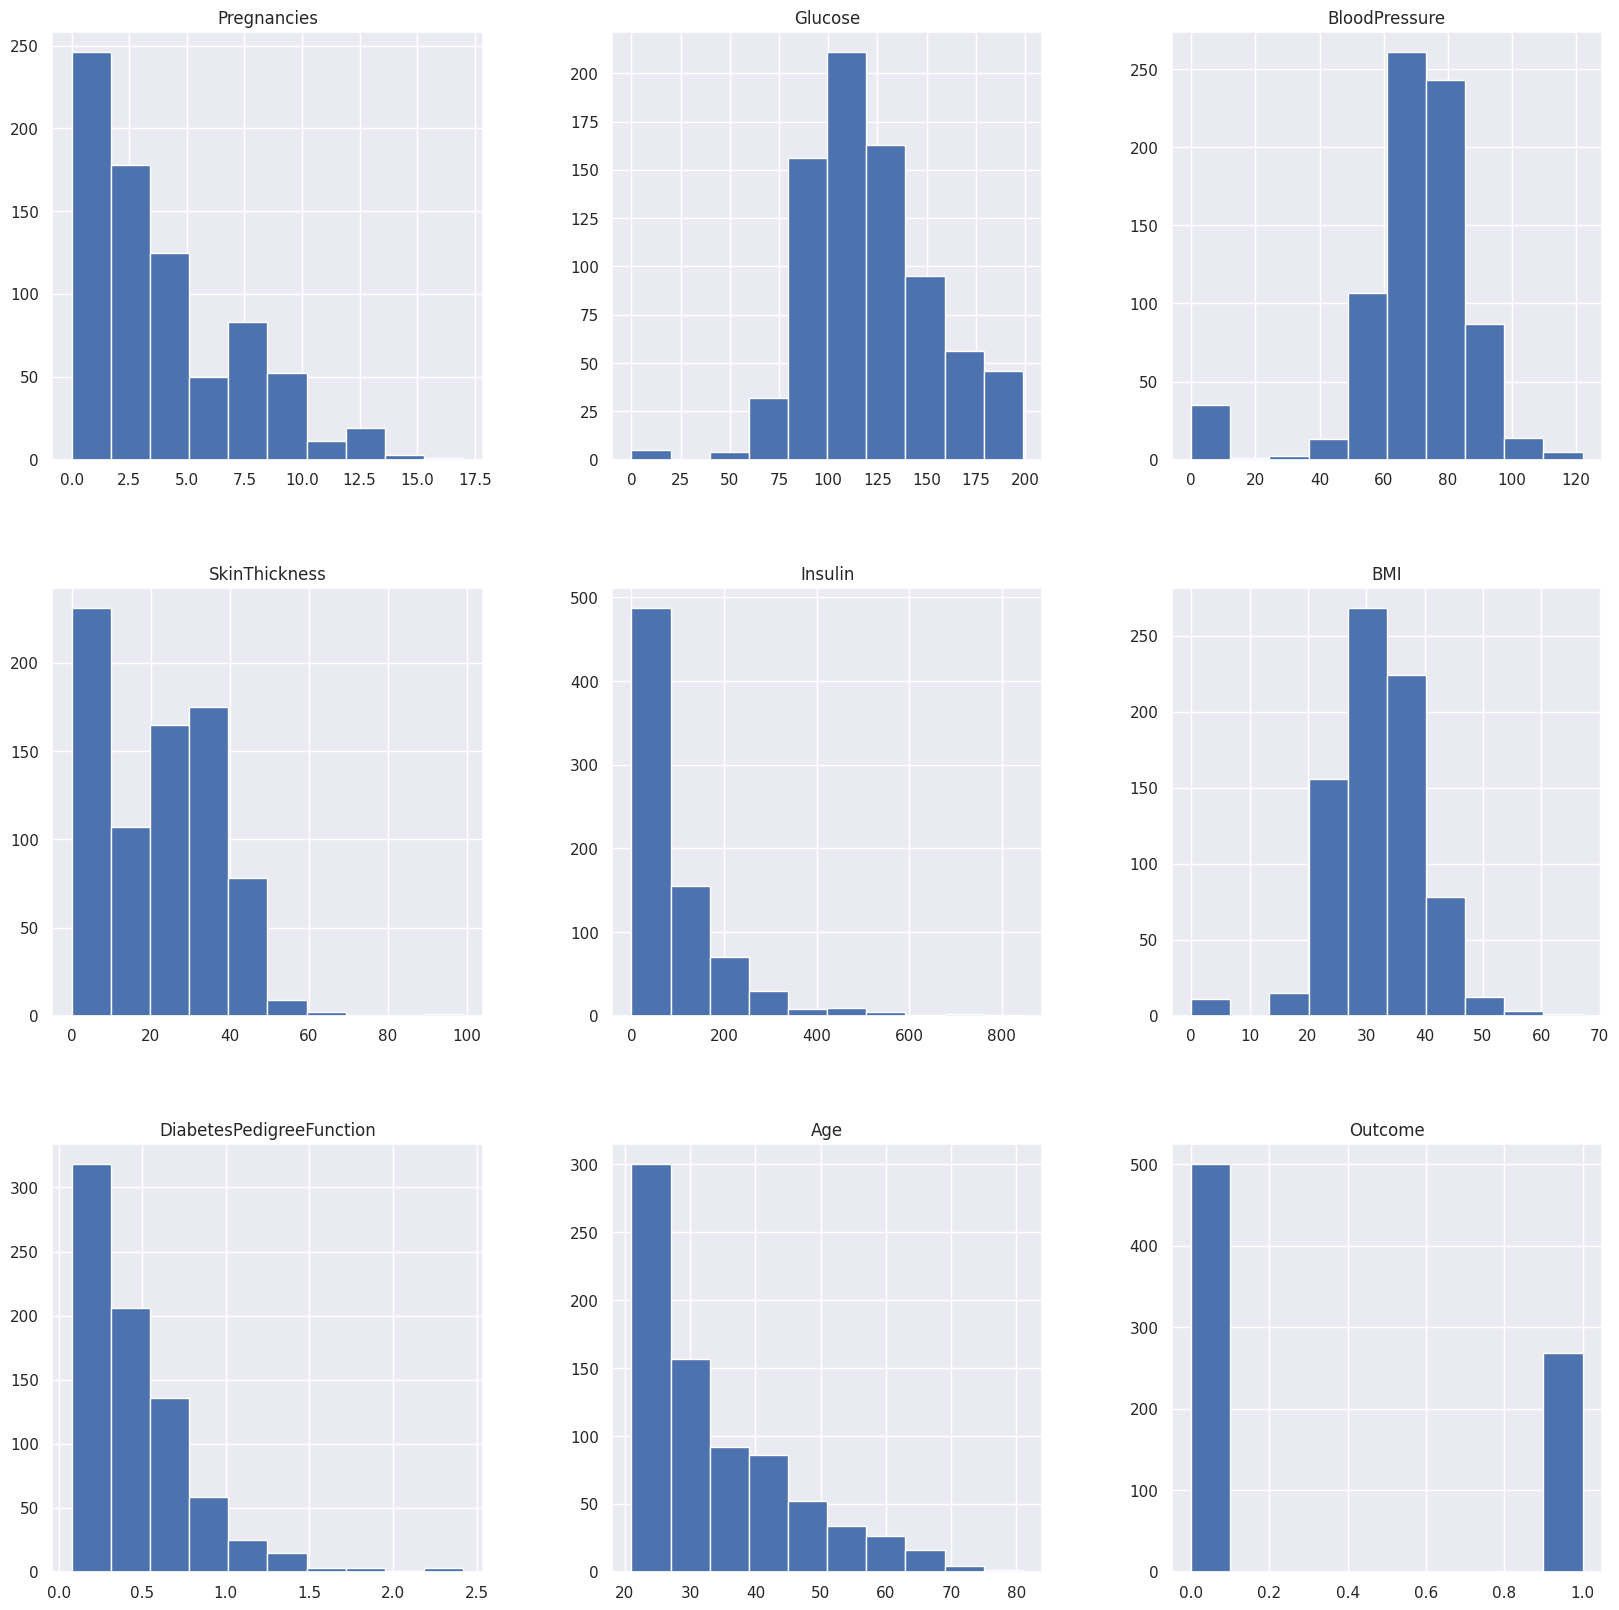

In [149]:
p = df.hist(figsize = (20,20))

# **Multivariate Analysis**

**Numerical Features**

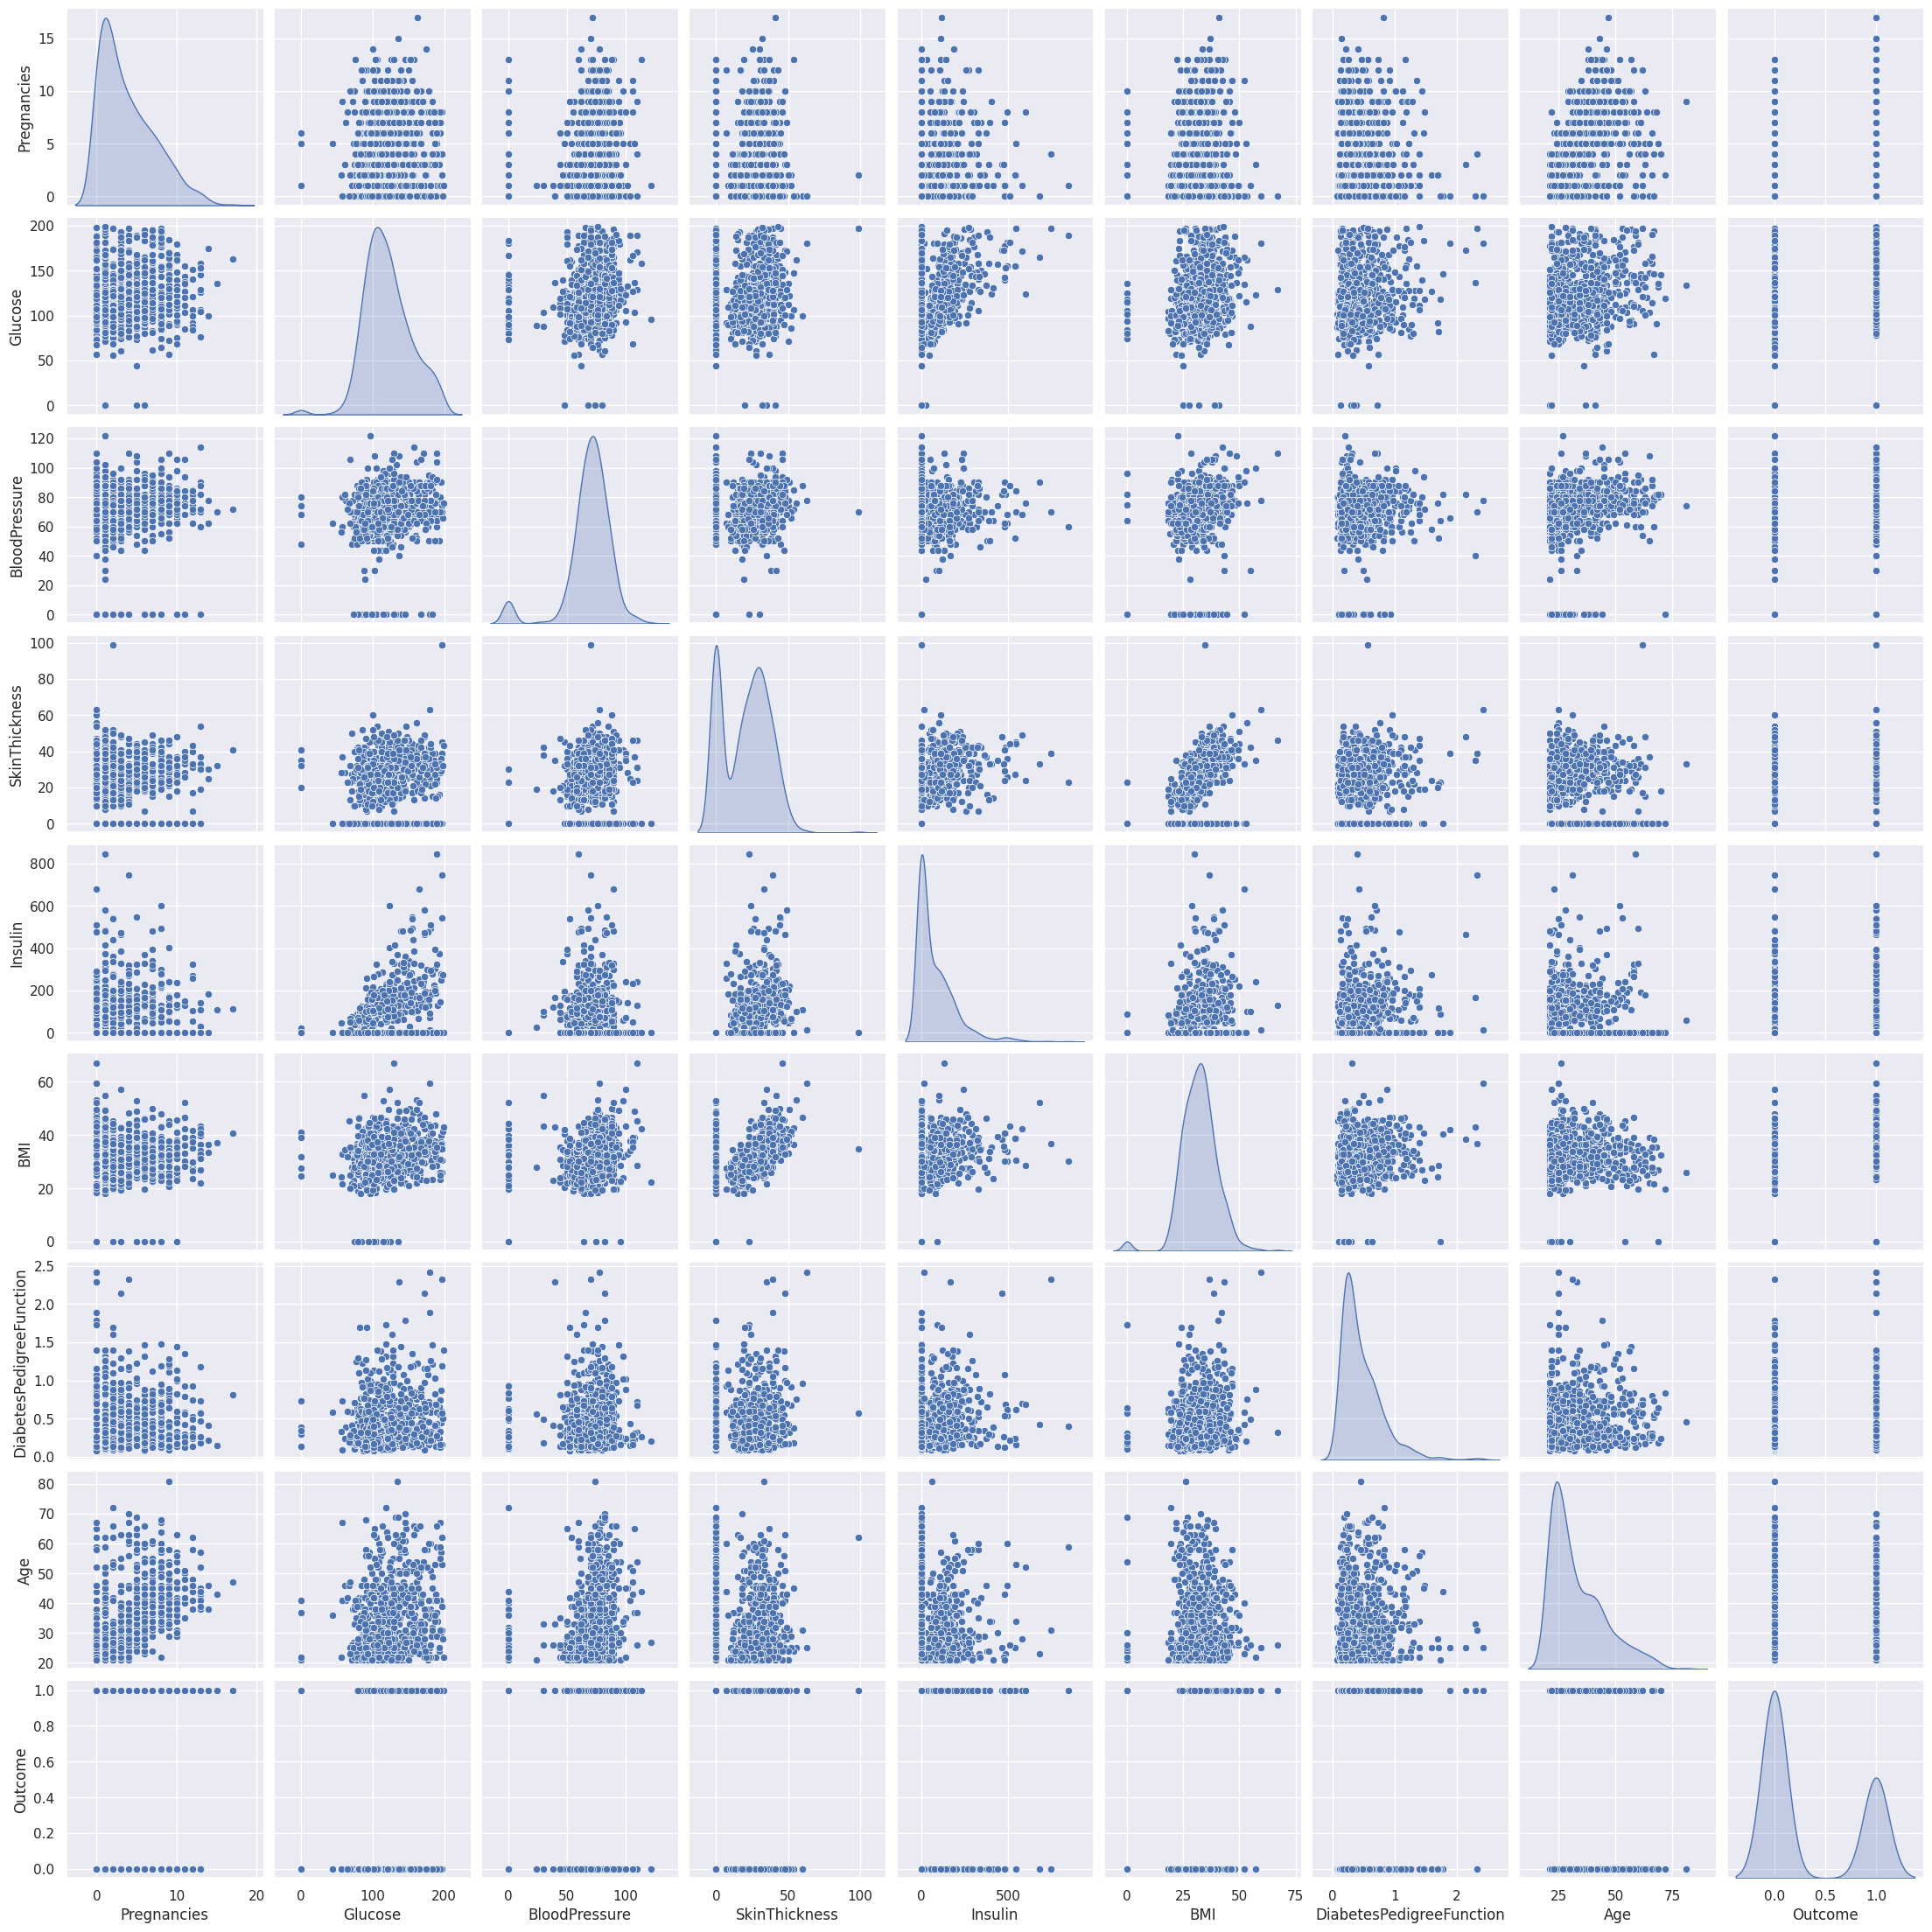

In [150]:
p = sns.pairplot(df,diag_kind = 'kde')

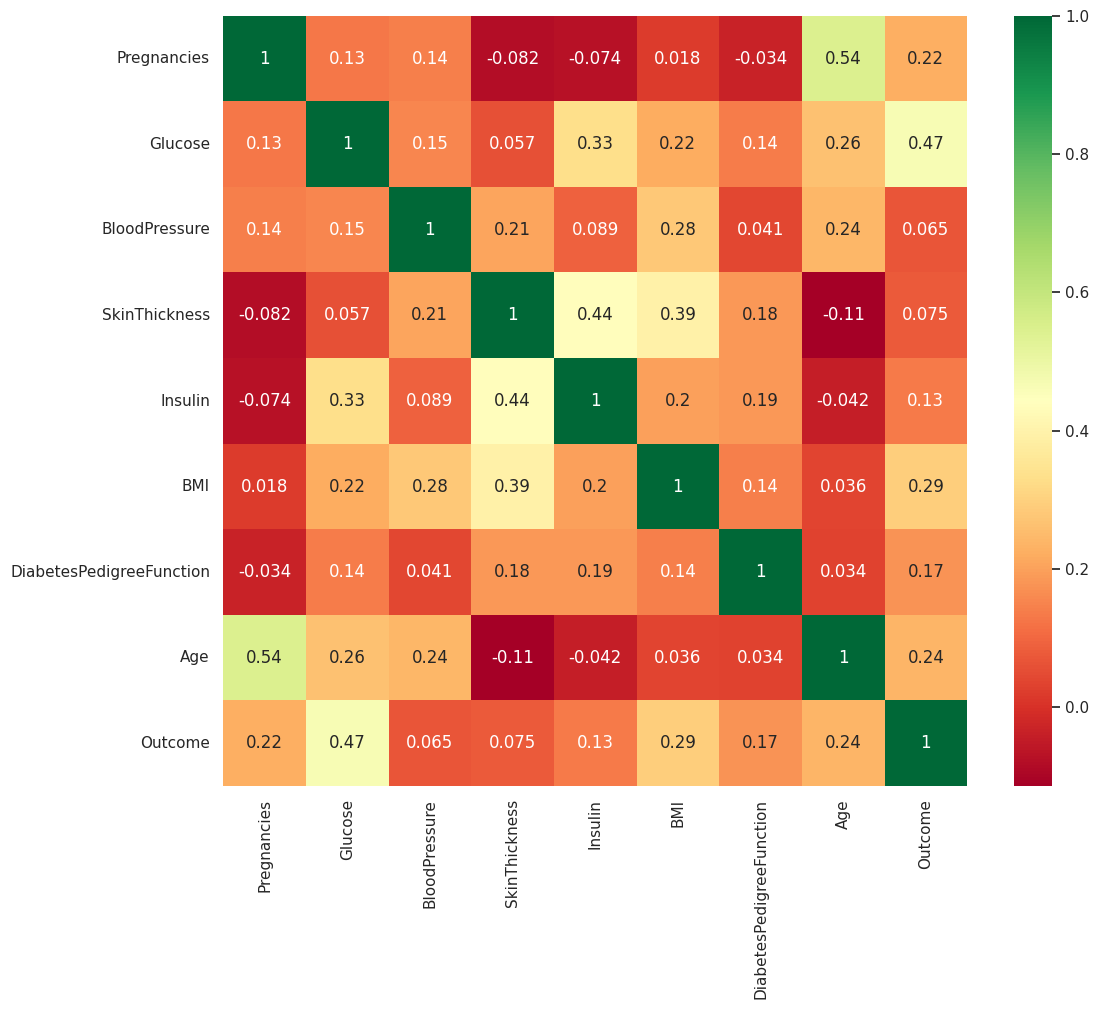

In [151]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

# **Data Preparation**

In [152]:
## presentase missing data pada setiap fitur
features = list(df.columns)
numoffeature = len(features)
columnscore={}

for i in range(0, numoffeature - 1):
  columnscore[features[i]] =  len(df[df[features[i]]== 0].index)/df[features[i]].shape[0]
columnscore

{'Pregnancies': 0.14453125,
 'Glucose': 0.006510416666666667,
 'BloodPressure': 0.045572916666666664,
 'SkinThickness': 0.2955729166666667,
 'Insulin': 0.4869791666666667,
 'BMI': 0.014322916666666666,
 'DiabetesPedigreeFunction': 0.0,
 'Age': 0.0}

**Feature Selection**

In [153]:
target_dep = {}
for i in range(0, numoffeature - 1):
  target_dep[features[i]] = df[features[numoffeature - 1]].corr(df[features[i]])
avg_target_dep = sum(target_dep.values())/len(target_dep)

for i in range(0, numoffeature - 1):
  if(columnscore[features[i]] > 0.2 and target_dep[features[i]]):
    df.drop(features[i], inplace=True, axis=1)

features = list(df.columns)
numoffeature = len(features)
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

**Handle missing value**

In [154]:
## replace zeros with NaN
df1 = df.copy(deep = True)
cols = ["Glucose", "BloodPressure", "BMI"]
for col in cols:
    df1[col].replace(0,np.NaN,inplace=True)

## showing missing value
print(df1.isnull().sum())

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


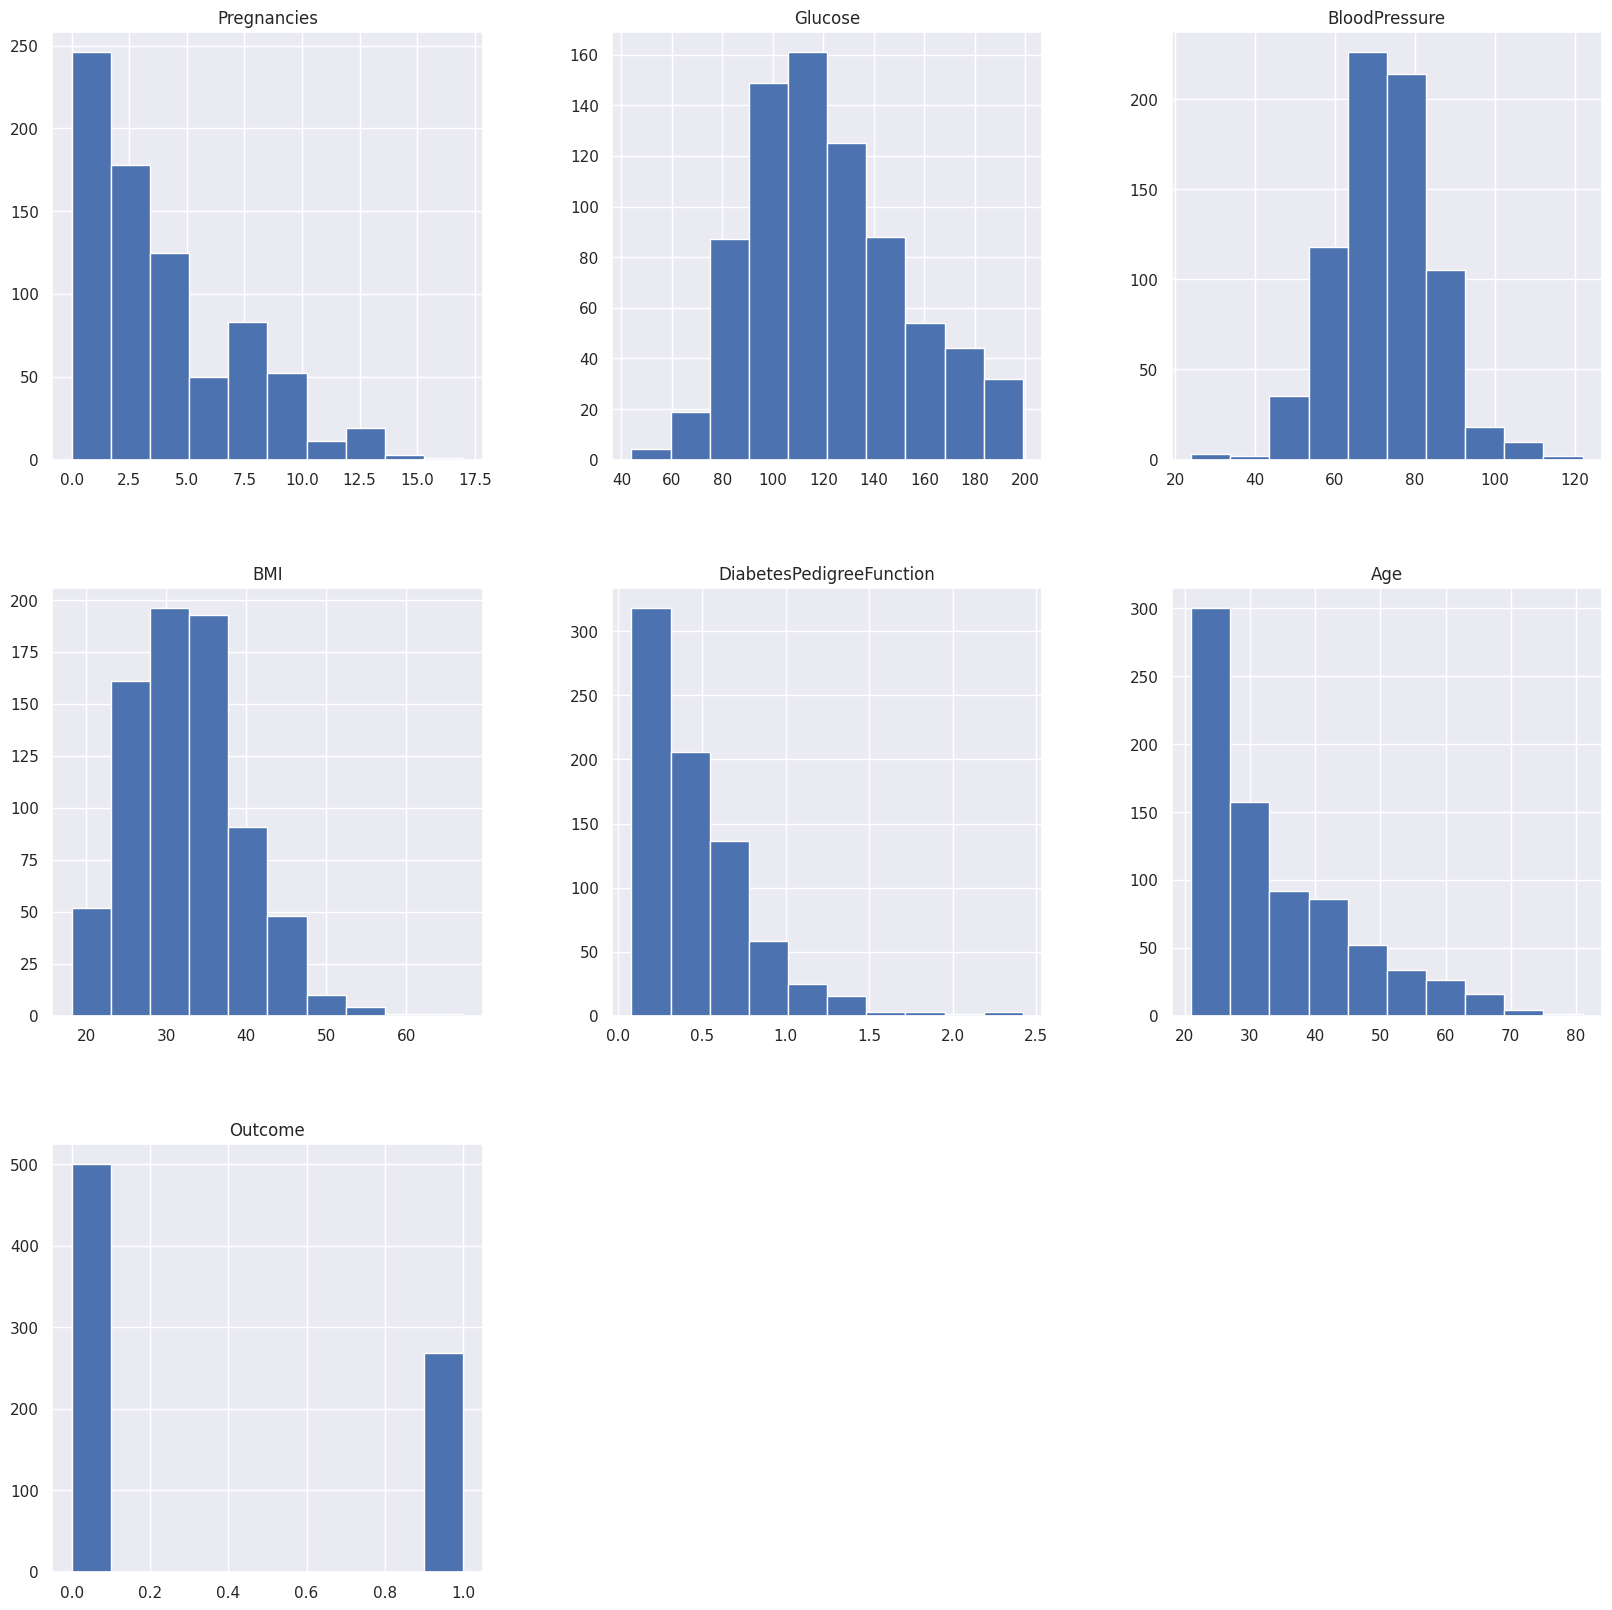

In [155]:
p = df1.hist(figsize = (20,20))

In [156]:
## replace NaN values accordance their distribution
for col in cols:
  df1[col].fillna(df1[col].median(), inplace = True)

print(df1.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [157]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Handle Outlier**

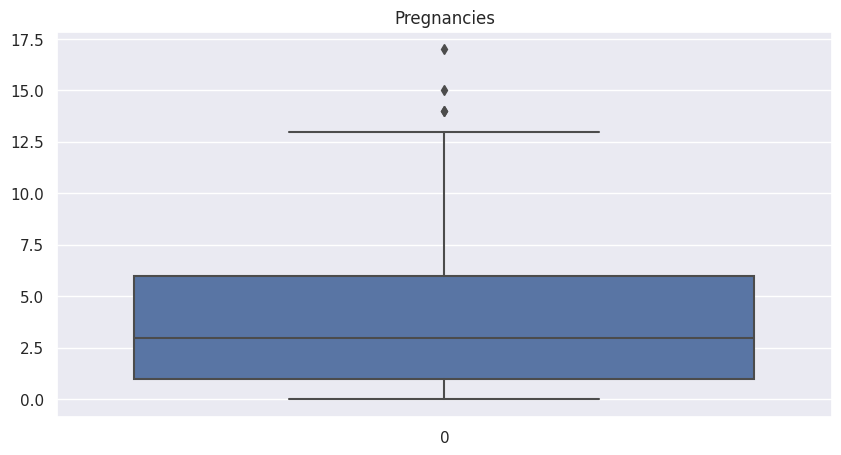

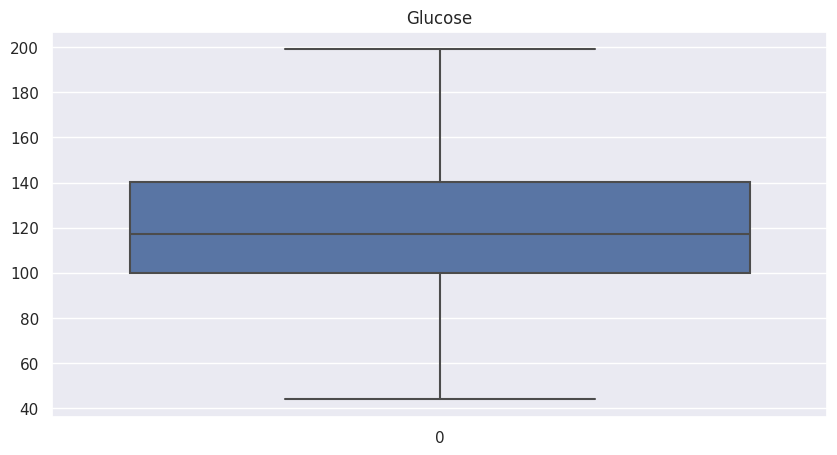

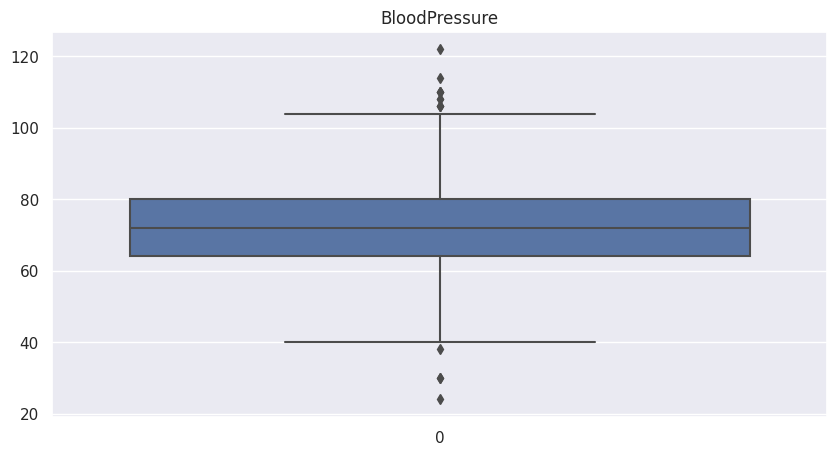

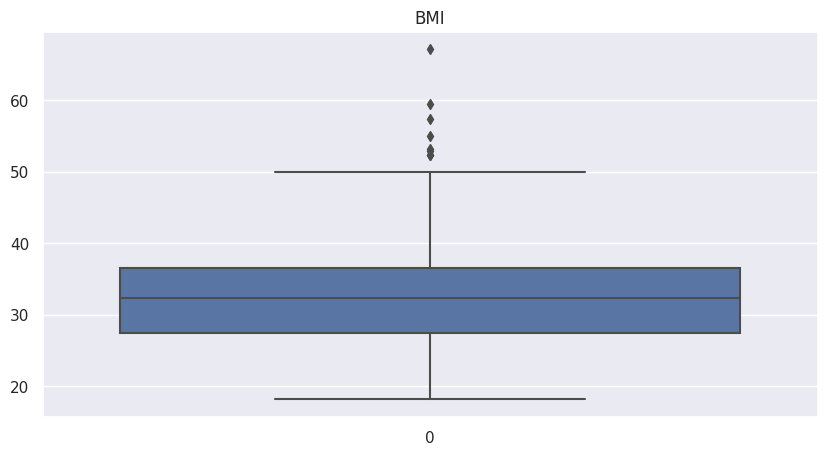

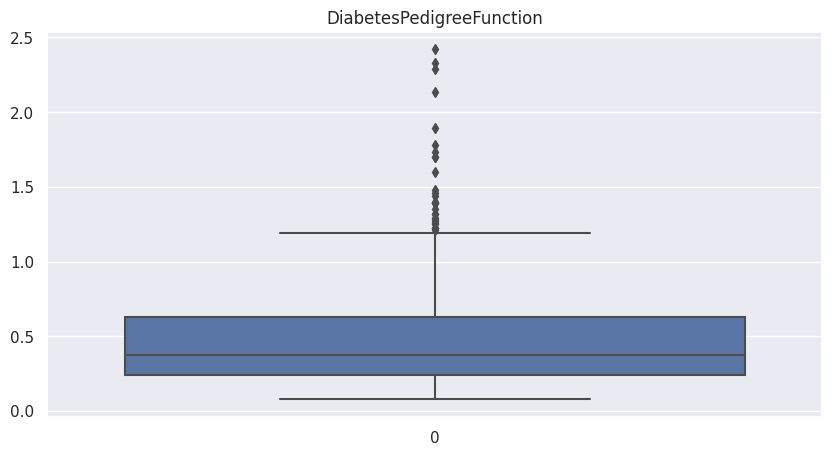

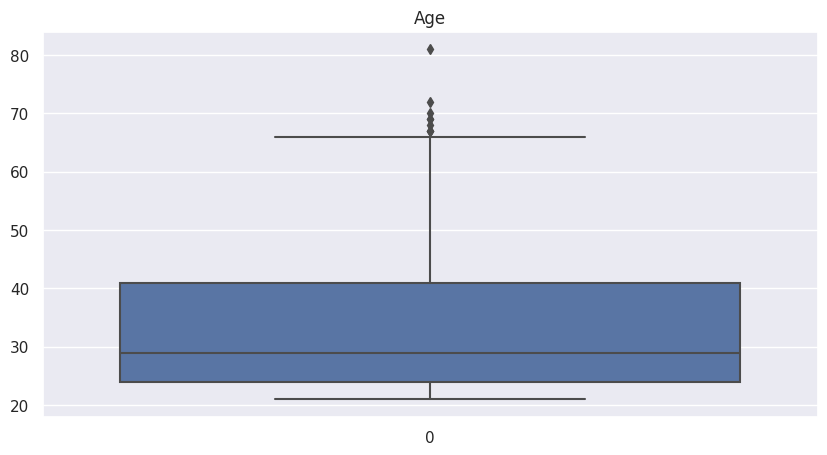

In [158]:
cols1 = ["Pregnancies","Glucose", "BloodPressure", "BMI","DiabetesPedigreeFunction","Age"]
for col in cols1:
  plt.figure(figsize = (10, 5))
  sns.boxplot(df1[col]).set(title=col)

In [159]:
outliers1 = pd.DataFrame()

for col in "Pregnancies","Glucose", "BloodPressure", "BMI","DiabetesPedigreeFunction","Age":
  data = df1[col]
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1

  threshold = 1.5
  outliers = df1[(data < Q1 - threshold * IQR) | (data > Q3 + threshold * IQR)]
  outliers1 = pd.concat([outliers, outliers1]).drop_duplicates()

In [160]:
df1=df1[~df1.isin(df1.loc[outliers1.index])].dropna()
df1

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,30.1,0.349,47.0,1.0


**Train Test Split**

In [161]:
from sklearn.model_selection import train_test_split

## data splitting
X = df1.drop(['Outcome'],axis = 1)
y = df1['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12345)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')


Total # of sample in whole dataset: 707
Total # of sample in train dataset: 600
Total # of sample in test dataset: 107


**Data standardization**

In [162]:
from sklearn.preprocessing import StandardScaler

## data standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_trainsc = pd.DataFrame(scaler.transform(X_train),columns=["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"])
X_trainsc.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.984541,0.753064,-1.123960,-0.498262,1.000761,2.643625
1,-1.145842,0.649328,-0.938053,-1.533305,-0.898216,-1.048589
2,-0.232820,-0.180558,-0.566240,0.938439,-1.123719,-0.402451
3,-1.145842,-0.318872,-0.659194,-1.147095,0.893943,-0.125535
4,0.071520,-0.215136,-0.752147,-0.482814,-1.218668,-0.771673


In [163]:
X_testsc = pd.DataFrame(scaler.transform(X_test),columns=["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age"])
X_testsc.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.375860,-0.215136,0.177386,-1.100750,1.226264,2.274404
1,0.375860,-2.635636,-0.938053,-1.085302,0.605140,0.335991
2,0.375860,-1.494543,0.921012,0.583126,-1.099982,0.243686
3,-0.841501,2.620306,0.363292,0.691264,1.744526,-0.310146
4,1.593222,-0.284293,0.921012,0.335951,-0.688537,0.335991


# **Model Development**

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score ,recall_score, f1_score, classification_report

**Random Forest**

In [165]:
RFC=RandomForestClassifier(n_estimators=100, max_depth=16, random_state=12345, n_jobs=-1)
RFC.fit(X_trainsc, y_train)
RFC_train_preds = RFC.predict(X_trainsc)
print(f"Training Accuracy Score: ", accuracy_score(y_train, RFC_train_preds))
print(f"\nClassification report:\n", classification_report(y_train, RFC_train_preds, digits=6))

Training Accuracy Score:  1.0

Classification report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       406
         1.0   1.000000  1.000000  1.000000       194

    accuracy                       1.000000       600
   macro avg   1.000000  1.000000  1.000000       600
weighted avg   1.000000  1.000000  1.000000       600



**Decision Tree**

In [166]:
DTC=DecisionTreeClassifier(random_state=12345)
DTC.fit(X_trainsc, y_train)
DTC_train_preds = DTC.predict(X_trainsc)
print(f"Training Accuracy Score: ", accuracy_score(y_train, DTC_train_preds))
print(f"\nClassification report:\n", classification_report(y_train, DTC_train_preds, digits=6))

Training Accuracy Score:  1.0

Classification report:
               precision    recall  f1-score   support

         0.0   1.000000  1.000000  1.000000       406
         1.0   1.000000  1.000000  1.000000       194

    accuracy                       1.000000       600
   macro avg   1.000000  1.000000  1.000000       600
weighted avg   1.000000  1.000000  1.000000       600



**K-Nearest Neighbor**

In [167]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_trainsc, y_train)
KNN_train_preds = KNN.predict(X_trainsc)
print(f"Training Accuracy Score: ", accuracy_score(y_train, KNN_train_preds))
print(f"\nClassification report:\n", classification_report(y_train, KNN_train_preds, digits=6))

Training Accuracy Score:  0.8516666666666667

Classification report:
               precision    recall  f1-score   support

         0.0   0.871194  0.916256  0.893157       406
         1.0   0.803468  0.716495  0.757493       194

    accuracy                       0.851667       600
   macro avg   0.837331  0.816376  0.825325       600
weighted avg   0.849296  0.851667  0.849293       600



# **Model Evaluation**

**Random Forest**

In [168]:
RFC_test_preds = RFC.predict(X_testsc)
print(f"Testing Accuracy Score: ", accuracy_score(y_test, RFC_test_preds))
print(f"\nClassification report:\n", classification_report(y_test, RFC_test_preds, digits=6))

Testing Accuracy Score:  0.8411214953271028

Classification report:
               precision    recall  f1-score   support

         0.0   0.824324  0.938462  0.877698        65
         1.0   0.878788  0.690476  0.773333        42

    accuracy                       0.841121       107
   macro avg   0.851556  0.814469  0.825516       107
weighted avg   0.845703  0.841121  0.836732       107



**Decision Tree**

In [169]:
DTC_test_preds = DTC.predict(X_testsc)
print(f"Testing Accuracy Score: ", accuracy_score(y_test, DTC_test_preds))
print(f"\nClassification report:\n", classification_report(y_test, DTC_test_preds, digits=6))

Testing Accuracy Score:  0.719626168224299

Classification report:
               precision    recall  f1-score   support

         0.0   0.733333  0.846154  0.785714        65
         1.0   0.687500  0.523810  0.594595        42

    accuracy                       0.719626       107
   macro avg   0.710417  0.684982  0.690154       107
weighted avg   0.715343  0.719626  0.710695       107



**K-Nearest Neighbor**

In [170]:
KNN_test_preds = KNN.predict(X_testsc)
print(f"Testing Accuracy Score: ", accuracy_score(y_test, KNN_test_preds))
print(f"\nClassification report:\n", classification_report(y_test, KNN_test_preds, digits=6))

Testing Accuracy Score:  0.7850467289719626

Classification report:
               precision    recall  f1-score   support

         0.0   0.783784  0.892308  0.834532        65
         1.0   0.787879  0.619048  0.693333        42

    accuracy                       0.785047       107
   macro avg   0.785831  0.755678  0.763933       107
weighted avg   0.785391  0.785047  0.779108       107



In [171]:
eval = pd.DataFrame(columns=['Accuracy Score', 'F1 Score'], index=['Random Forest','Decision Tree','K-Nearest Neighbor'])
model_dict = {'Random Forest' : RFC, 'Decision Tree' : DTC, 'K-Nearest Neighbor' : KNN}
for name, model in model_dict.items():
    eval.loc[name, 'Accuracy Score'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_testsc))
    eval.loc[name, 'F1 Score'] = f1_score(y_true=y_test, y_pred=model.predict(X_testsc))
eval

,Accuracy Score,F1 Score
Random Forest,0.841121,0.773333
Decision Tree,0.719626,0.594595
K-Nearest Neighbor,0.785047,0.693333


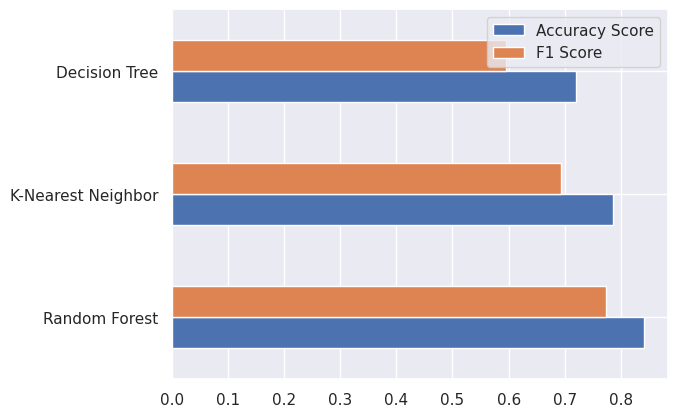

In [172]:
fig, ax = plt.subplots()
eval.sort_values(by='F1 Score', ascending=False).plot(kind='barh', ax=ax, zorder=5)
ax.grid(zorder=0)

**Kesimpulan**

Pada proyek ini disimpulkan bahwa model *Random Forest* merupakan model terbaik dengan nilai *accuracy score* dan *F1 Score* pada pengujian data training dan test tertinggi, model *Decision Tree* pada urutan kedua, dan *K-Nearest Neighbor* pada urutan terakhir.

Berdasarkan hasil proyek prediksi diabetes yang dilakukan dengan menggunakan algoritma *Random Forest*, *Decision Tree* dan *K-Nearest Neighbor*, proyek ini dapat membantu dalam deteksi dini penyakit diabetes dan memberikan prediksi yang akurat untuk pasien diabetes serta dapat digunakan sebagai dasar untuk pengembangan model prediksi yang lebih baik di masa depan.

Pengembangan selanjutnya dapat dilakukan dengan penggunaan hyperparameter tuning untuk meningkatkan kinerja model atau mencoba algoritma klasifikasi lainnya.